In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [ ]:
import pandas as pd

# GitHub Raw File Link
url = "https://raw.githubusercontent.com/Yogesh0903/Phishing_URL/main/PhiUSIIL_Phishing_URL_Dataset.csv"

# Read CSV file
df = pd.read_csv(url)

# Display first 10 rows
df.head(10)

FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   
5   23107.txt     https://www.globalreporting.org         30   
6   23034.txt          https://www.saffronart.com         25   
7  696732.txt          https://www.nerdscandy.com         25   
8  739255.txt      https://www.hyderabadonline.in         29   
9   14486.txt                 https://www.aap.org         18   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   
5     www.globalreporting.org            23           0  org   
6          www.saffronart.com            18           0  com   
7          www.nerdscandy.com            18           0  com   
8      www.hyderabadonline.in            22           0   in   
9                 www.aap.org            11           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2               100.0              0.866667           0.028555  ...    0   
3               100.0              1.000000           0.522907  ...    1   
4               100.0              1.000000           0.079963  ...    1   
5               100.0              1.000000           0.079963  ...    0   
6               100.0              1.000000           0.522907  ...    0   
7               100.0              1.000000           0.522907  ...    0   
8               100.0              1.000000           0.005084  ...    0   
9               100.0              1.000000           0.079963  ...    0   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50        9       8           39   
2       0                 1         10        2       7           42   
3       1                 1          3       27      15           22   
4       0                 1        244       15      34           72   
5       0                 1         35        1      11           86   
6       0                 1         32        4      14           44   
7       0                 1         24        2      22           36   
8       0                 1         71        4       9           40   
9       0                 1         10        1      12          173   

   NoOfEmptyRef  NoOfExternalRef  label  
0             0              124      1  
1             0              217      1  
2             2                5      1  
3             1               31      1  
4             1               85      1  
5             0               14      1  
6             2               17      1  
7             0               15      1  
8             1              317      1  
9             6               65      1  

[10 rows x 56 columns]

##Data Description


## Text Visibility pd Config

In [ ]:
pd.set_option('display.max_colwidth', None) # to display the whole strings and not collapse them
pd.set_option('display.max_columns', None) # to not collapse columns when viewing data
pd.set_option("display.max_columns", len(df.columns)) # to display all columns in the output
pd.set_option('display.max_rows', None) # to display all rows in the output

### Null Data Check

In [ ]:
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots                        0
IsResponsive                  0
NoOfURLRedirect               0
NoOfSelfRedirect              0
HasDescription                0
NoOfPopup                     0
NoOfiFrame                    0
HasExternalFormSubmit         0
HasSocialNet                  0
HasSubmitButton               0
HasHiddenFields               0
HasPasswordField              0
Bank                          0
Pay                           0
Crypto                        0
HasCopyrightInfo              0
NoOfImage                     0
NoOfCSS                       0
NoOfJS                        0
NoOfSelfRef                   0
NoOfEmptyRef                  0
NoOfExternalRef               0
label                         0
dtype: int64

#### Duplicate Data Check

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [ ]:
df.nunique()

FILENAME                      235795
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
LargestLineLength              26181
HasTitle                           2
Title                         197874
DomainTitleMatchScore            152
URLTitleMatchScore               497
HasFavicon                         2
Robots                             2
IsResponsive                       2
NoOfURLRedirect                    2
NoOfSelfRedirect                   2
HasDescription                     2
NoOfPopup                        115
NoOfiFrame                       119
HasExternalFormSubmit              2
HasSocialNet                       2
HasSubmitButton                    2
HasHiddenFields                    2
HasPasswordField                   2
Bank                               2
Pay                                2
Crypto                             2
HasCopyrightInfo                   2
NoOfImage                        992
NoOfCSS                          209
NoOfJS                           253
NoOfSelfRef                     1374
NoOfEmptyRef                     296
NoOfExternalRef                 1191
label                              2
dtype: int64

In [ ]:
Numerical_values=df.select_dtypes(include=['int64'])
Numerical_values.nunique()

URLLength                       482
DomainLength                    101
IsDomainIP                        2
TLDLength                        12
NoOfSubDomain                    10
HasObfuscation                    2
NoOfObfuscatedChar               20
NoOfLettersInURL                421
NoOfDegitsInURL                 182
NoOfEqualsInURL                  25
NoOfQMarkInURL                    5
NoOfAmpersandInURL               31
NoOfOtherSpecialCharsInURL       74
IsHTTPS                           2
LineOfCode                    10738
LargestLineLength             26181
HasTitle                          2
HasFavicon                        2
Robots                            2
IsResponsive                      2
NoOfURLRedirect                   2
NoOfSelfRedirect                  2
HasDescription                    2
NoOfPopup                       115
NoOfiFrame                      119
HasExternalFormSubmit             2
HasSocialNet                      2
HasSubmitButton                   2
HasHiddenFields                   2
HasPasswordField                  2
Bank                              2
Pay                               2
Crypto                            2
HasCopyrightInfo                  2
NoOfImage                       992
NoOfCSS                         209
NoOfJS                          253
NoOfSelfRef                    1374
NoOfEmptyRef                    296
NoOfExternalRef                1191
label                             2
dtype: int64

In [ ]:
df.shape

(235795, 56)

In [ ]:
df.rename(columns={'NoOfDegitsInURL':'NoOfDigitsInURL'},inplace=True)
df.rename(columns={'DegitRatioInURL':'DigitRatioInURL'},inplace=True)

In [ ]:
df.rename(columns={'label':'Phishing'},inplace=True)

In [ ]:
df.head()

FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  URLCharProb  \
0               100.0              1.000000           0.522907     0.061933   
1               100.0              0.666667           0.032650     0.050207   
2               100.0              0.866667           0.028555     0.064129   
3               100.0              1.000000           0.522907     0.057606   
4               100.0              1.000000           0.079963     0.059441   

   TLDLength  NoOfSubDomain  HasObfuscation  NoOfObfuscatedChar  \
0          3              1               0                   0   
1          2              1               0                   0   
2          2              2               0                   0   
3          3              1               0                   0   
4          3              1               0                   0   

   ObfuscationRatio  NoOfLettersInURL  LetterRatioInURL  NoOfDigitsInURL  \
0               0.0                18             0.581                0   
1               0.0                 9             0.391                0   
2               0.0                15             0.517                0   
3               0.0                13             0.500                0   
4               0.0                20             0.606                0   

   DigitRatioInURL  NoOfEqualsInURL  NoOfQMarkInURL  NoOfAmpersandInURL  \
0              0.0                0               0                   0   
1              0.0                0               0                   0   
2              0.0                0               0                   0   
3              0.0                0               0                   0   
4              0.0                0               0                   0   

   NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  IsHTTPS  LineOfCode  \
0                           1                  0.032        1         558   
1                           2                  0.087        1         618   
2                           2                  0.069        1         467   
3                           1                  0.038        1        6356   
4                           1                  0.030        1        6089   

   LargestLineLength  HasTitle  \
0               9381         1   
1               9381         1   
2                682         1   
3              26824         1   
4              28404         1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Title  \
0  à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸­à¸±à¸žà¹€à¸”à¸—à¸ªà¸”à¹ƒà¸«à¸¡à¹ˆà¸—à¸¸à¸à¸§à¸±à¸™ &#8211; à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸­

In [ ]:
list(df.columns)

['FILENAME',
 'URL',
 'URLLength',
 'Domain',
 'DomainLength',
 'IsDomainIP',
 'TLD',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'HasObfuscation',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDigitsInURL',
 'DigitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL',
 'IsHTTPS',
 'LineOfCode',
 'LargestLineLength',
 'HasTitle',
 'Title',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'HasDescription',
 'NoOfPopup',
 'NoOfiFrame',
 'HasExternalFormSubmit',
 'HasSocialNet',
 'HasSubmitButton',
 'HasHiddenFields',
 'HasPasswordField',
 'Bank',
 'Pay',
 'Crypto',
 'HasCopyrightInfo',
 'NoOfImage',
 'NoOfCSS',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef',
 'NoOfExternalRef',
 'Phishing']

In [ ]:
Categorical_values=df.select_dtypes(include=['object','category']).columns.tolist()
Numerical_values=df.select_dtypes(include=['int64','float64']).columns.tolist()
print('Categorical Columns:',Categorical_values)
print('Numerical Columns:',Numerical_values)

Categorical Columns: ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']
Numerical Columns: ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDigitsInURL', 'DigitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'Phishing']


In [ ]:
Float_values=df.select_dtypes(include=['float64']).columns.tolist()
print('Float Columns:',Float_values)

Float Columns: ['URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'ObfuscationRatio', 'LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore']


In [ ]:
Binary_values=[col for col in df.columns if df[col].nunique()==2]
print('Binary Columns:',Binary_values)

Binary Columns: ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'Phishing']


## Correlation

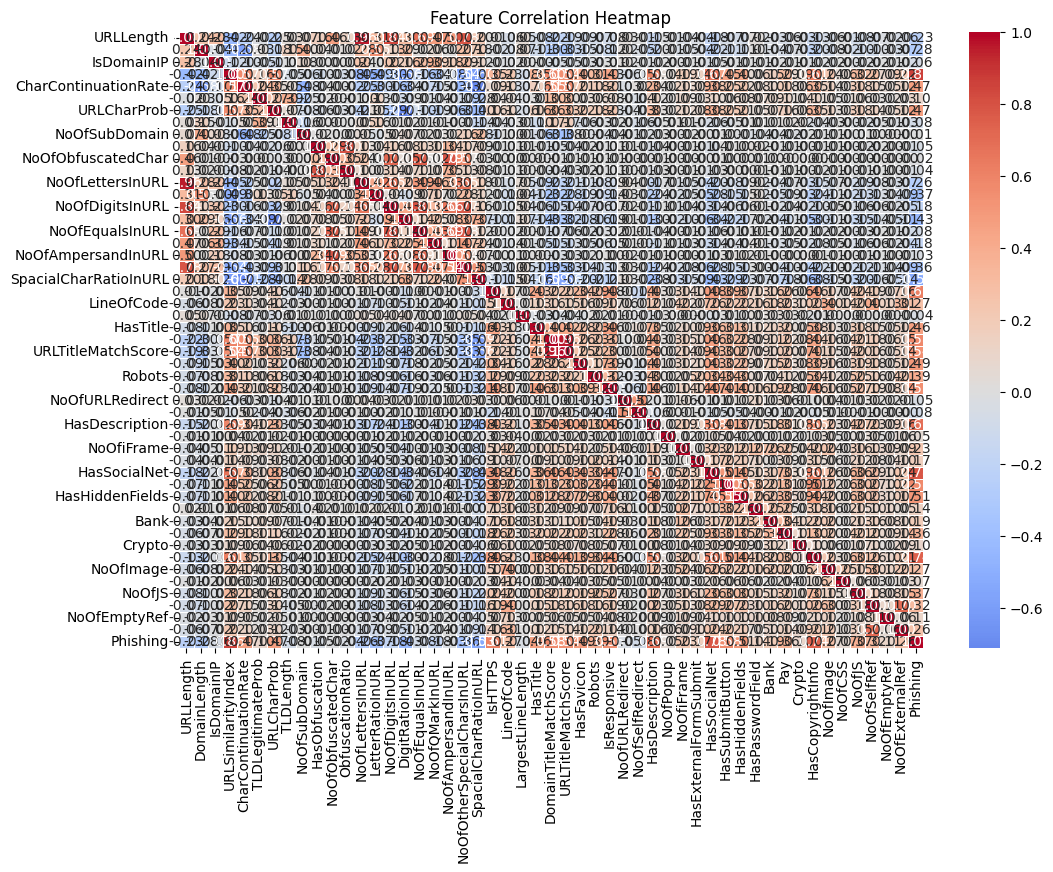

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the Pearson correlation matrix
correlation_matrix = df_numeric.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, linewidths=0.5, annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Filtered Correlation greater than 0.7

Strongly Correlated Feature Pairs (|correlation| ≥ 0.7):
                Feature 1                   Feature 2  Correlation
13  DomainTitleMatchScore          URLTitleMatchScore     0.961008
0               URLLength            NoOfLettersInURL     0.956047
3      URLSimilarityIndex                    Phishing     0.860358
1               URLLength             NoOfDigitsInURL     0.835809
10        NoOfDigitsInURL             NoOfEqualsInURL     0.806024
6          HasObfuscation            ObfuscationRatio     0.798791
9      NoOfObfuscatedChar          NoOfAmpersandInURL     0.786451
12        NoOfEqualsInURL  NoOfOtherSpecialCharsInURL     0.784654
14           HasSocialNet                    Phishing     0.784255
2               URLLength  NoOfOtherSpecialCharsInURL     0.782582
11        NoOfDigitsInURL  NoOfOtherSpecialCharsInURL     0.767477
8      NoOfObfuscatedChar             NoOfEqualsInURL     0.754543
15       HasCopyrightInfo                    Phishing     0.743358
7    

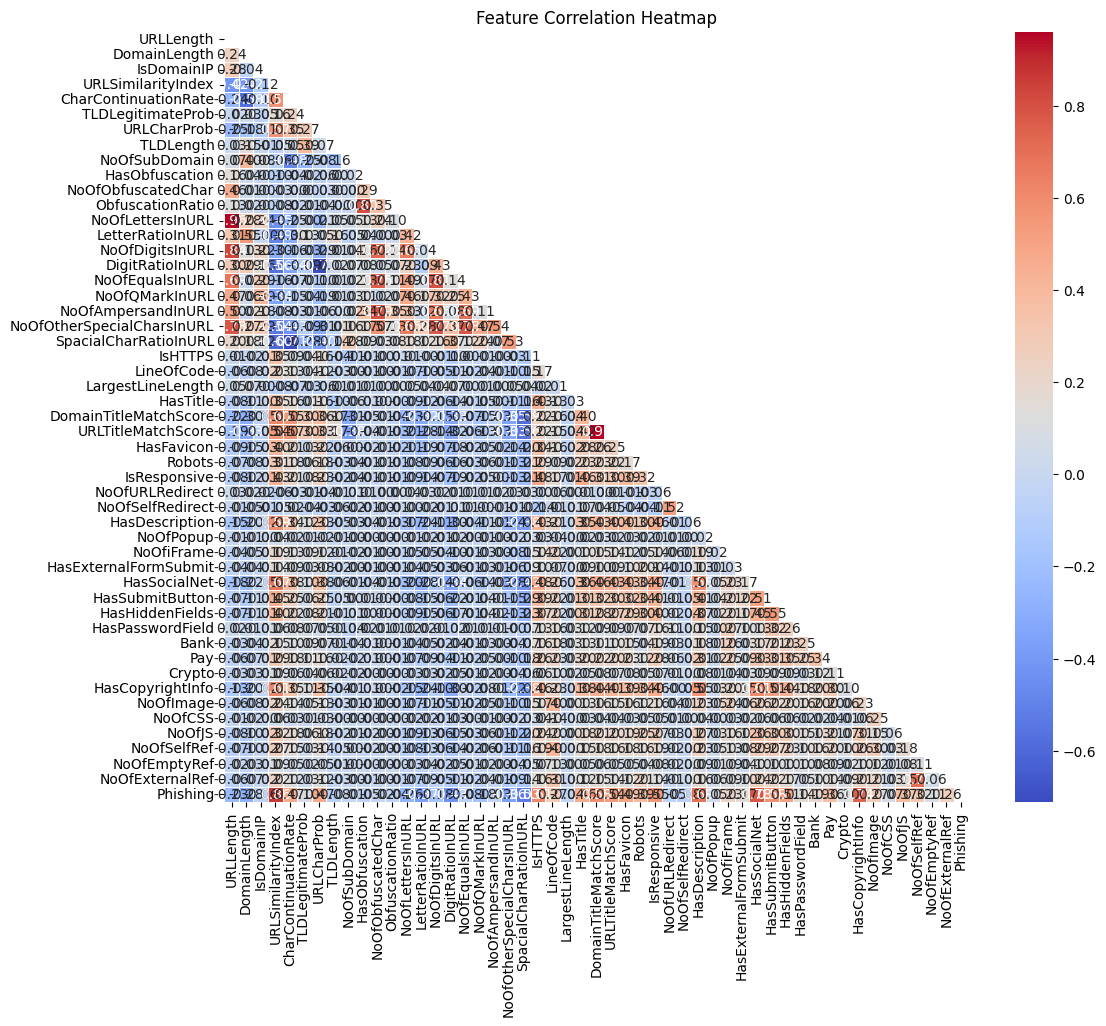

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the Pearson correlation matrix
correlation_matrix = df_numeric.corr()

# Define the threshold for strong correlations
threshold = 0.7

# Extract strongly correlated feature pairs (excluding self-correlation)
strong_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Avoid duplicates and self-correlation
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:  # Strong positive or negative correlation
            strong_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Convert to DataFrame for better visualization
strong_corr_df = pd.DataFrame(strong_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Sort by absolute correlation value in descending order
strong_corr_df = strong_corr_df.sort_values(by="Correlation", key=abs, ascending=False)

# Display all strongly correlated pairs
print("Strongly Correlated Feature Pairs (|correlation| ≥ 0.7):")
print(strong_corr_df)

# --- PLOTTING ---

# Set the mask to remove the diagonal (self-correlations of 1.0)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with improved readability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


##Exploratory Data Analysis - EDA

### Univariate

#### All Varibales Graph

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

Categorical Columns: ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']
Numerical Columns (excluding float): ['URLLength', 'DomainLength', 'IsDomainIP', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDigitsInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'Phishing']


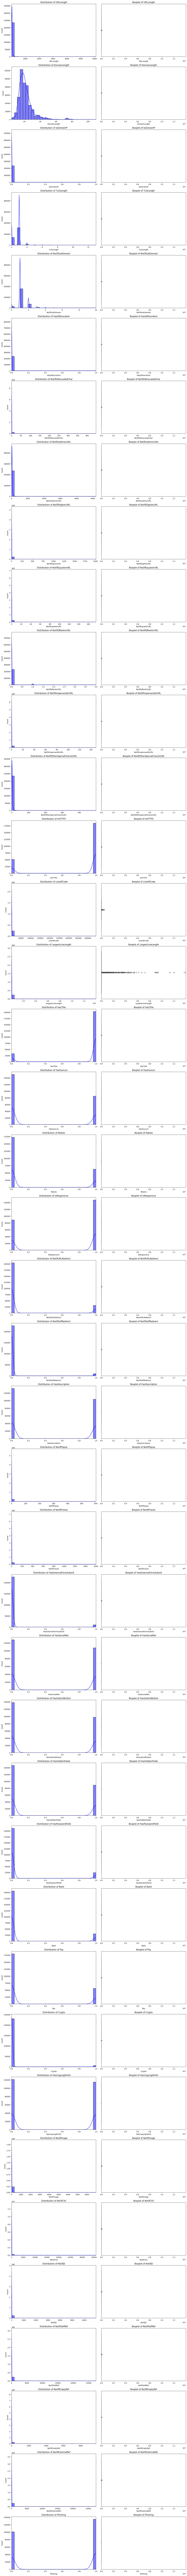

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify column types
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()

# Exclude float columns from numerical columns
int_columns = [col for col in numerical_columns if col not in float_columns]

# Print filtered column lists
print('Categorical Columns:', categorical_columns)
print('Numerical Columns (excluding float):', int_columns)

# Determine global min/max for scaling consistency
global_min = df[int_columns].min().min()
global_max = df[int_columns].max().max()

# Plot graphs for each integer variable
plt.figure(figsize=(15, len(int_columns) * 5))

for i, col in enumerate(int_columns):
    plt.subplot(len(int_columns), 2, 2*i+1)

    # Histogram
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlim(df[col].min(), df[col].max())  # Adjust x-axis per feature

    plt.subplot(len(int_columns), 2, 2*i+2)

    # Boxplot
    sns.boxplot(x=df[col], color='red')
    plt.title(f"Boxplot of {col}")
    plt.xlim(global_min, global_max)  # Consistent x-scale for all boxplots

plt.tight_layout()
plt.show()


In [ ]:
df.describe()

URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min                0.000000           0.000000       0.001083       2.000000   
25%                0.680000           0.005977       0.050747       2.000000   
50%                1.000000           0.079963       0.057970       3.000000   
75%                1.000000           0.522907       0.062875       3.000000   
max                1.000000           0.522907       0.090824      13.000000   

       NoOfSubDomain  HasObfuscation  NoOfObfuscatedChar  ObfuscationRatio  \
count  235795.000000   235795.000000       235795.000000     235795.000000   
mean        1.164758        0.002057            0.024861          0.000138   
std         0.600969        0.045306            1.876249          0.003817   
min         0.000000        0.000000            0.000000          0.000000   
25%         1.000000        0.000000            0.000000          0.000000   
50%         1.000000        0.000000            0.000000          0.000000   
75%         1.000000        0.000000            0.000000          0.000000   
max        10.000000        1.000000          447.000000          0.348000   

       NoOfLettersInURL  LetterRatioInURL  NoOfDigitsInURL  DigitRatioInURL  \
count     235795.000000     235795.000000    235795.000000    235795.000000   
mean          19.428919          0.515946         1.881011         0.028616   
std           29.090330          0.123315        11.886695         0.070897   
min            0.000000          0.000000         0.000000         0.000000   
25%           10.000000          0.435000         0.000000         0.000000   
50%           14.000000          0.519000         0.000000         0.000000   
75%           20.000000          0.594000         0.000000         0.000000   
max         5191.000000          0.926000      2011.000000         0.684000   

       NoOfEqualsInURL  NoOfQMarkInURL  NoOfAmpersandInURL  \
count    235795.000000   235795.000000       235795.000000   
mean          0.062241        0.029403            0.025056   
std           0.934704        0.193505            0.836448   
min           0.000000        0.000000            0.000000   
25%           0.000000        0.000000            0.000000   
50%           0.000000        0.000000            0.000000   
75%           0.000000        0.000000            0.000000   
max         176.000000        4.000000          149.000000   

       NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL        IsHTTPS  \
count               235795.000000          235795.000000  235795.000000   
mean                     2.340198               0.063309       0.782625   
std                      3.527603               0.032393       0.412461   
min                      0.000000               0.000000       0.000000   
25%                      1.000000               0.038000       1.000000   
50%                      1.000000               0.050000       1.000000   
75%                      3.000000               0.083000       1.000000   
max                    499.000000               0

In [ ]:
df['TLD'].nunique()

695

#### Binary Columns List

In [ ]:
Binary_values=[col for col in df.columns if df[col].nunique()==2]
print('Binary Columns:',Binary_values)

Binary Columns: ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'Phishing']


presence of domain Ip in URL is less than 0.2%

#### Domain IP in URL

<ipython-input-24-927afbabb445>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsDomainIP', data=df, palette="coolwarm")


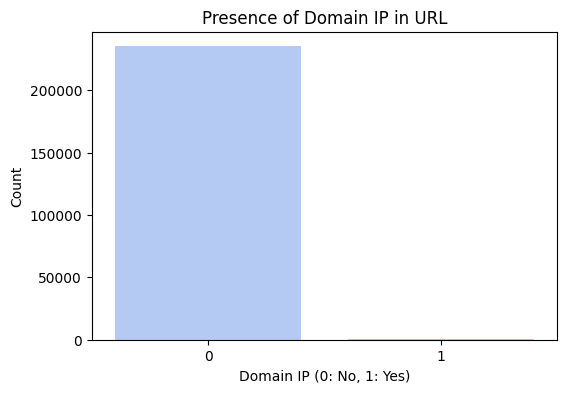

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsDomainIP', data=df, palette="coolwarm")
plt.title("Presence of Domain IP in URL")
plt.xlabel("Domain IP (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


Presence of Obfuscation in URL is less than 0.2%

#### Presence of Obfuscation

<ipython-input-25-dd0ed81417a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['HasObfuscation'], palette="coolwarm")


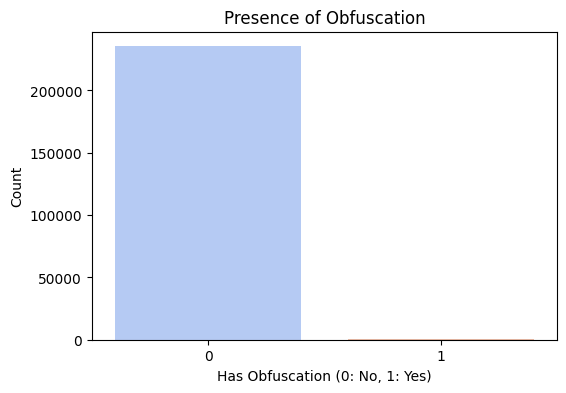

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['HasObfuscation'], palette="coolwarm")
plt.title("Presence of Obfuscation")
plt.xlabel("Has Obfuscation (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

#### All Binary Variable Graphs

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


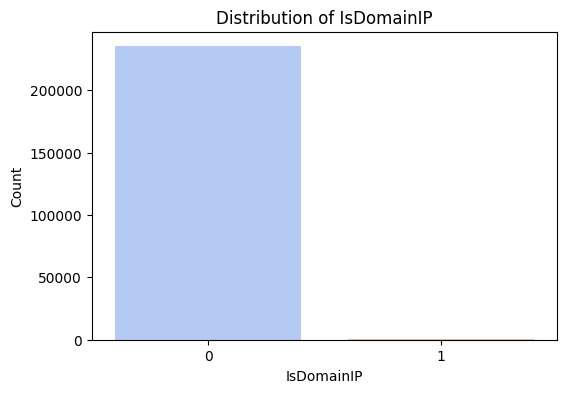

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


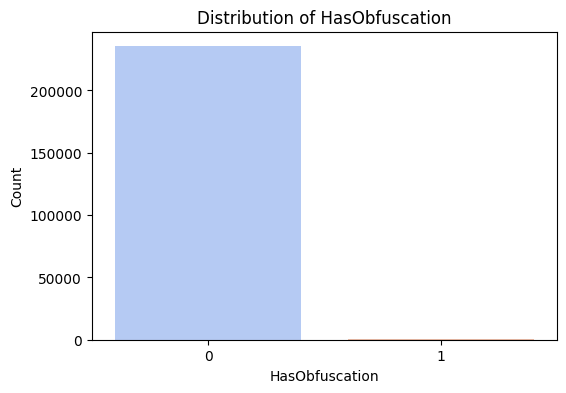

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


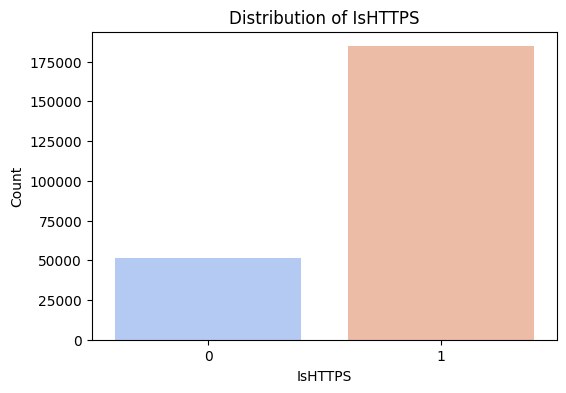

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


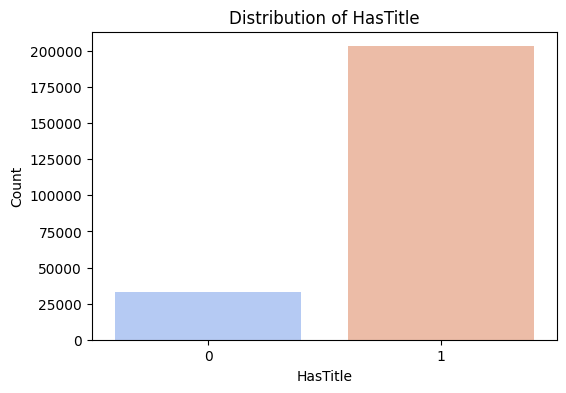

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


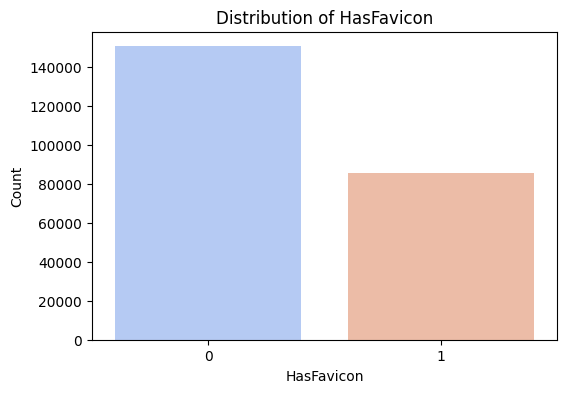

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


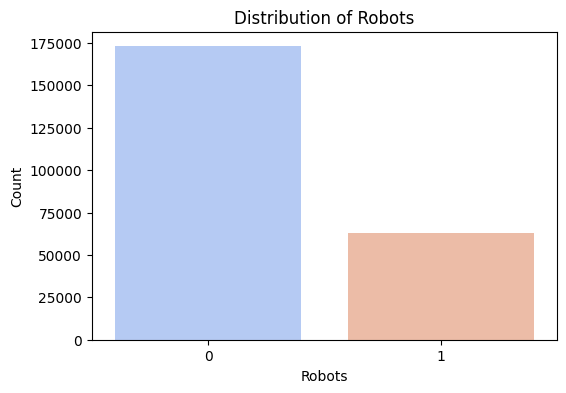

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


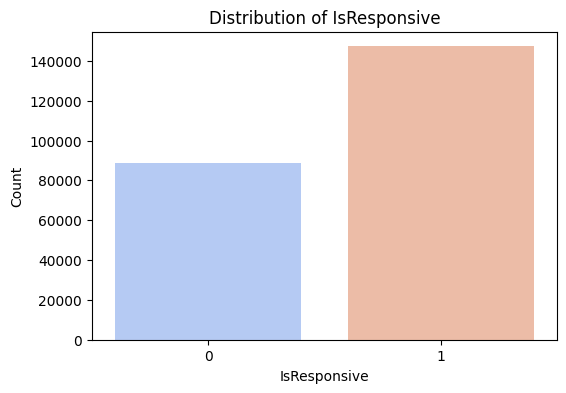

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


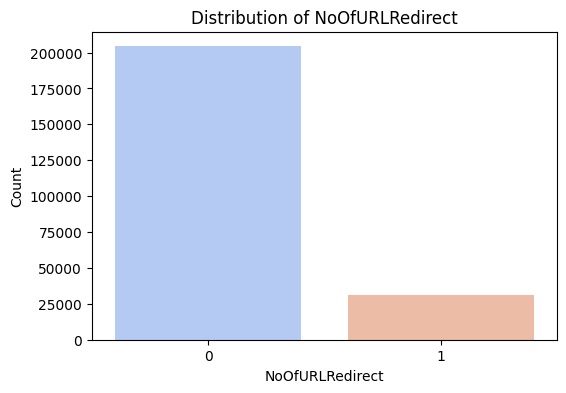

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


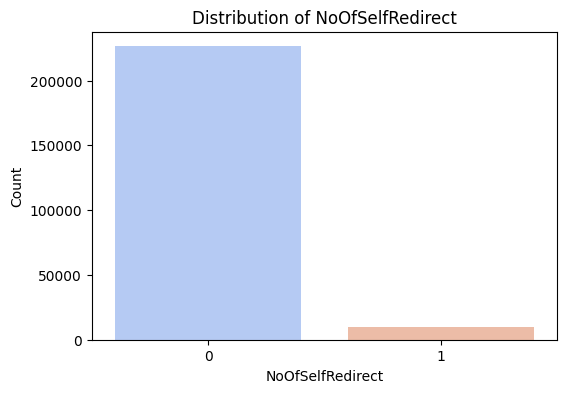

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


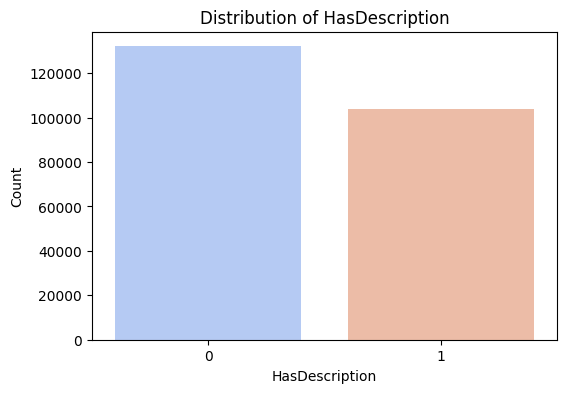

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


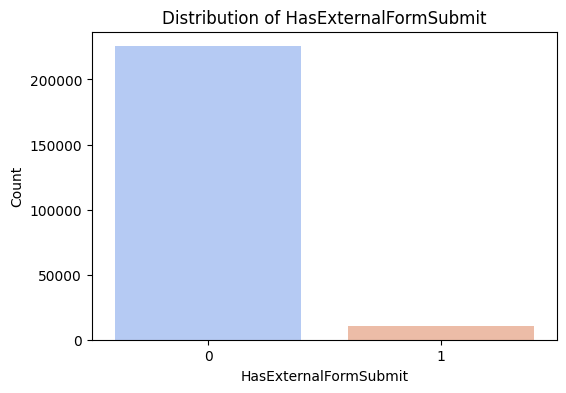

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


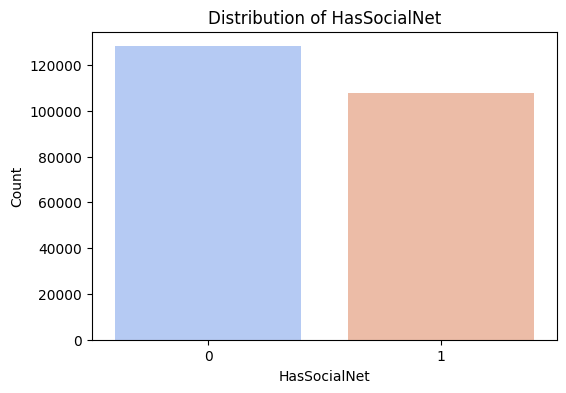

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


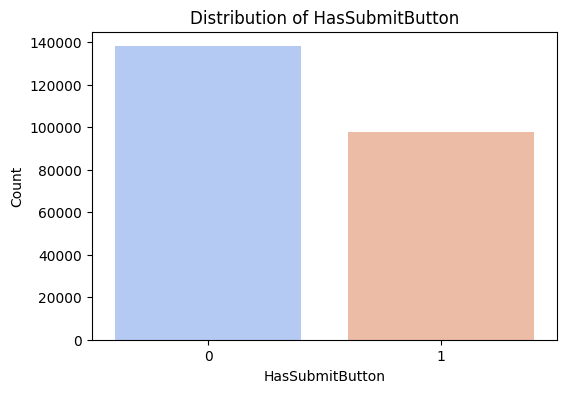

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


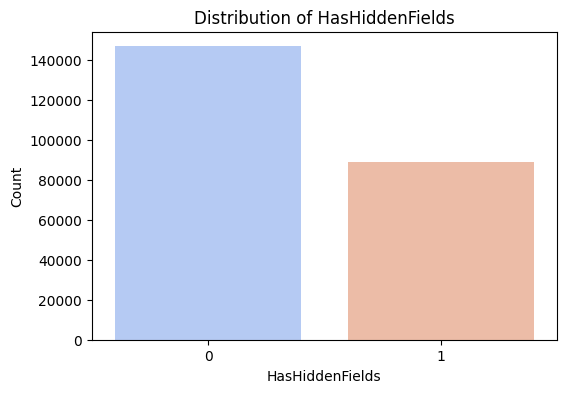

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


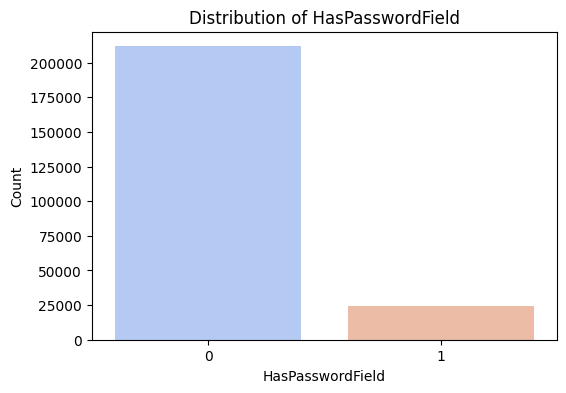

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


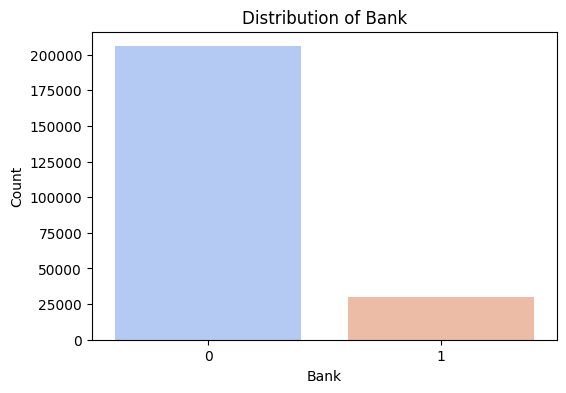

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


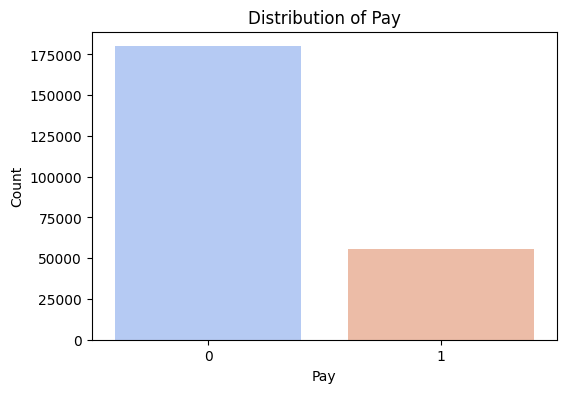

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


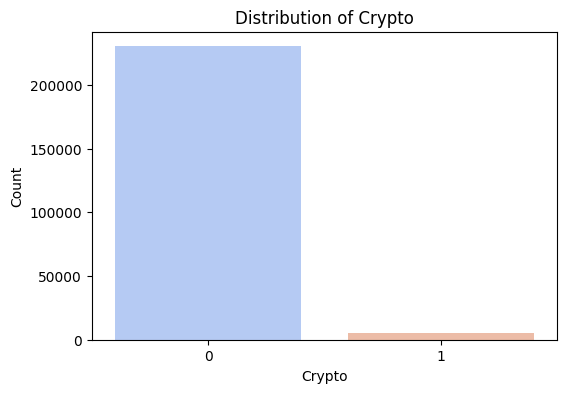

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


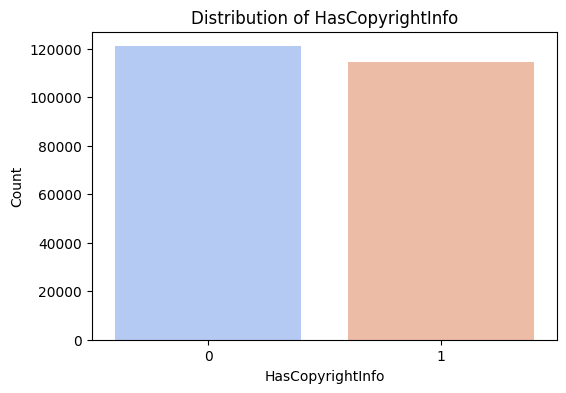

<ipython-input-26-60171259dd55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


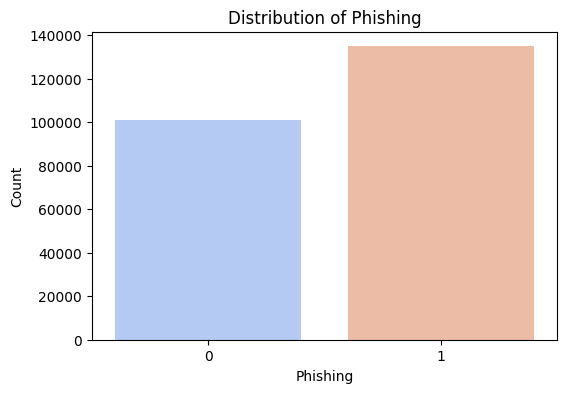

In [ ]:
# prompt: similar graphs for all binary columns .make it seperate

# Plotting separate graphs for each binary column

for col in Binary_values:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


#### Distribution of TLD Length

<ipython-input-27-03407871f4d2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TLDLength', y='Count', data=tld_length_counts, palette='pastel')


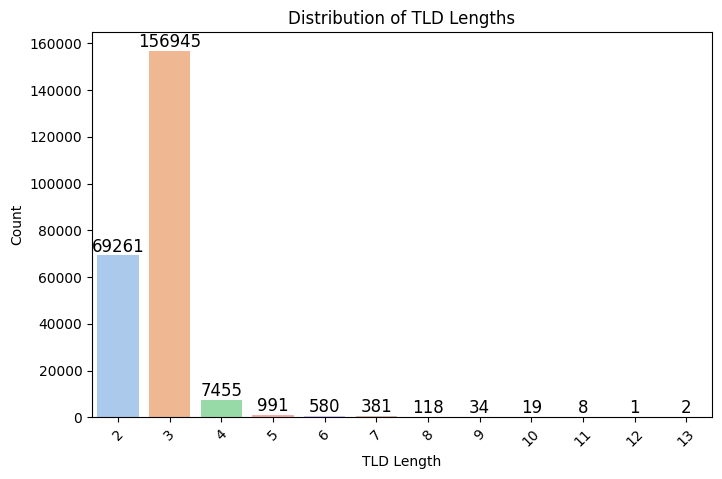

In [ ]:
# Ensure 'TLDLength' exists in the DataFrame
if 'TLDLength' in df.columns:
    # Compute value counts for TLDLength
    tld_length_counts = df['TLDLength'].value_counts().reset_index()
    tld_length_counts.columns = ['TLDLength', 'Count']

    # Sort by TLDLength
    tld_length_counts = tld_length_counts.sort_values(by='TLDLength')

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='TLDLength', y='Count', data=tld_length_counts, palette='pastel')

    # Add labels to bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12)

    # Customize plot
    plt.title("Distribution of TLD Lengths")
    plt.xlabel("TLD Length")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    plt.show()
else:
    print("Column 'TLDLength' not found in DataFrame.")


#### Less than 100 Unique Values Graphs

<ipython-input-28-38e1bb04a199>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')


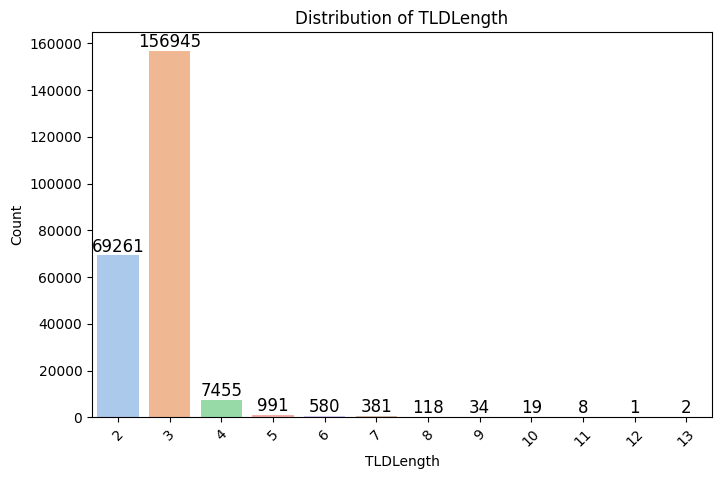

<ipython-input-28-38e1bb04a199>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')


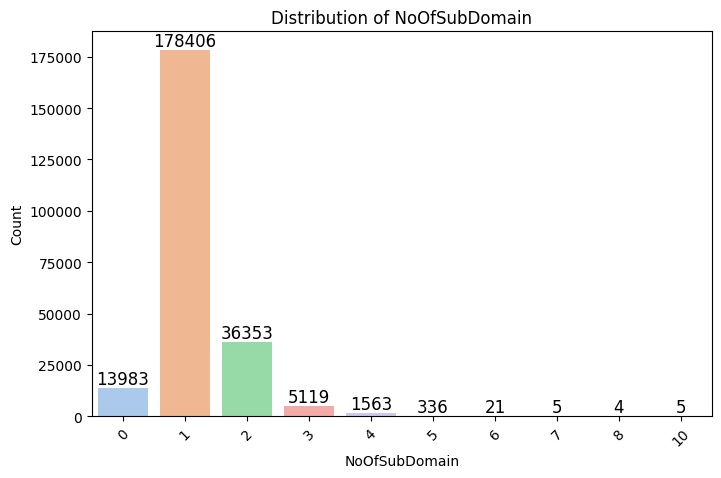

<ipython-input-28-38e1bb04a199>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')


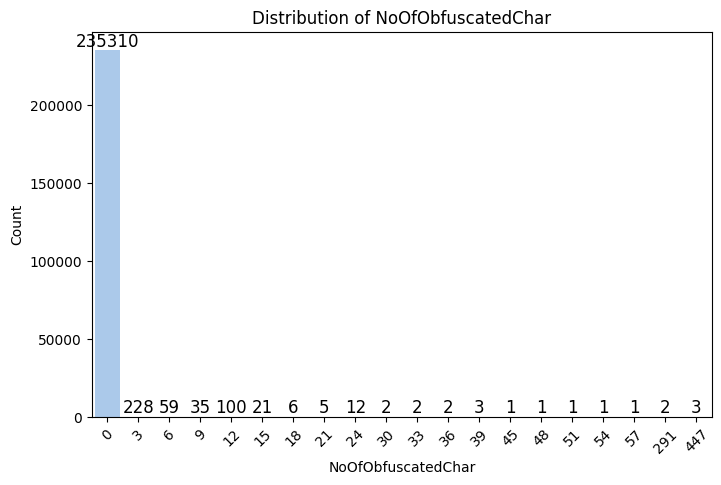

<ipython-input-28-38e1bb04a199>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')


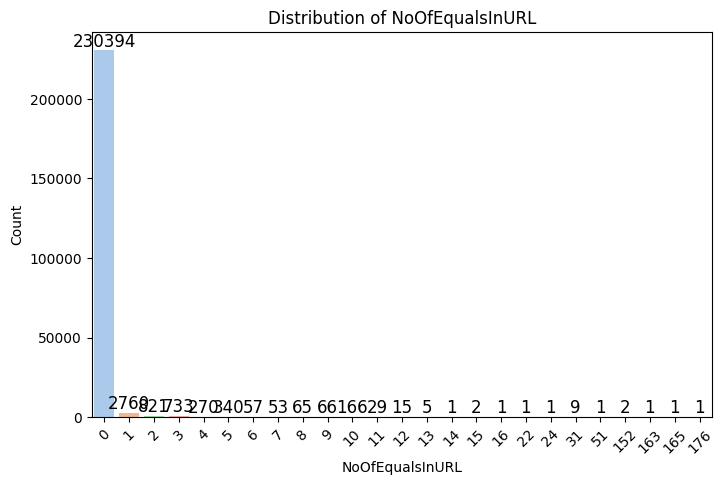

<ipython-input-28-38e1bb04a199>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')


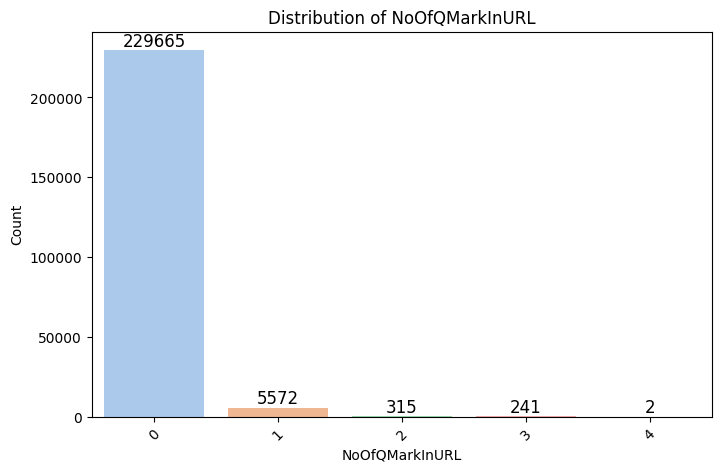

<ipython-input-28-38e1bb04a199>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')


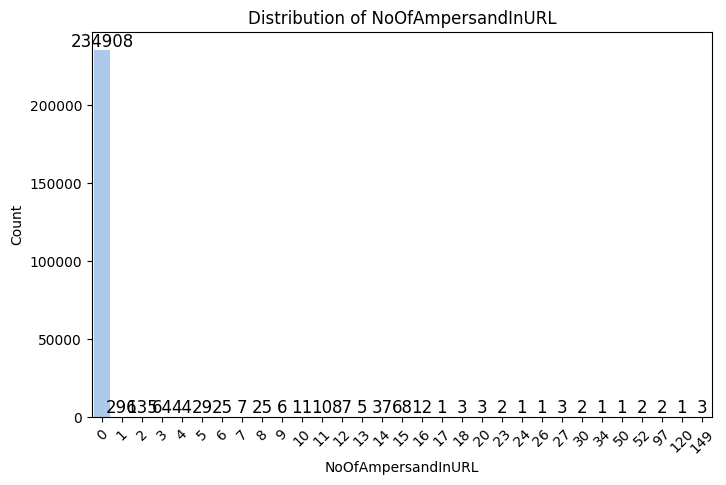

<ipython-input-28-38e1bb04a199>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')


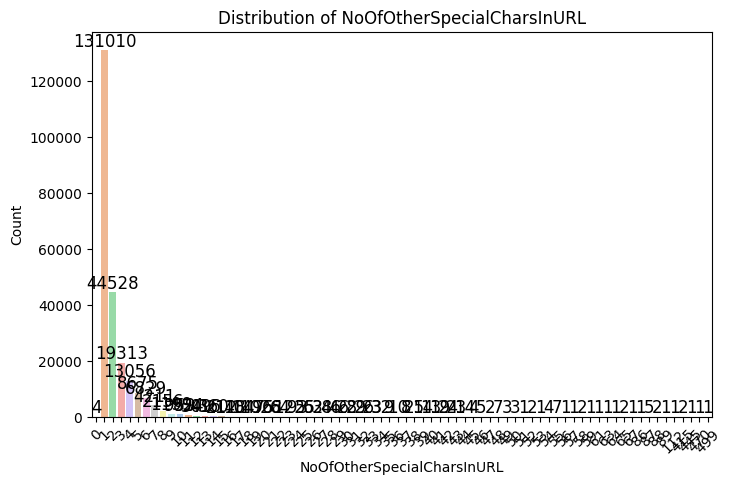

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select columns with less than 100 unique values
selected_cols = [col for col in df.columns if df[col].nunique() < 100 and pd.api.types.is_numeric_dtype(df[col]) and col not in Binary_values and col not in Float_values]

# Iterate and plot for each selected numeric column
for col in selected_cols:
    # Compute value counts for the column
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'Count']

    # Sort by the column values
    value_counts = value_counts.sort_values(by=col)

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=col, y='Count', data=value_counts, palette='pastel')

    # Add labels to bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12)

    # Customize plot
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

### Bivariate

# ####TLD Length Vs No Of Subdomain

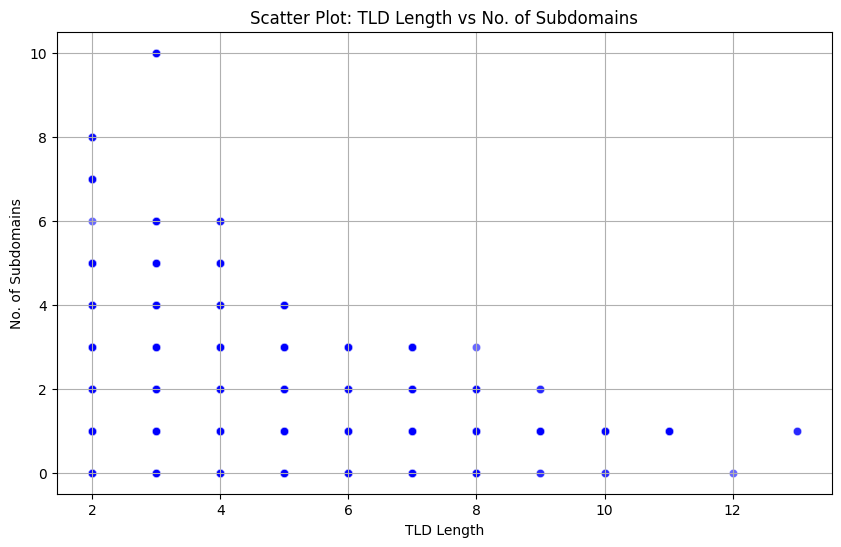

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=df['TLDLength'], y=df['NoOfSubDomain'], alpha=0.6, color='blue')

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of Subdomains")
plt.xlabel("TLD Length")
plt.ylabel("No. of Subdomains")
plt.grid(True)
plt.show()


####TLD Length Vs No of Ampersand in URL



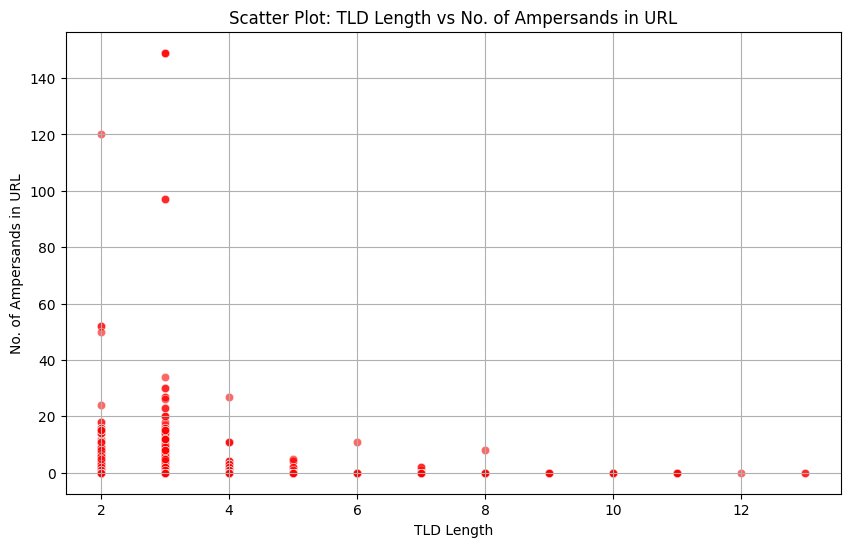

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=df['TLDLength'], y=df['NoOfAmpersandInURL'], alpha=0.6, color='red')

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of Ampersands in URL")
plt.xlabel("TLD Length")
plt.ylabel("No. of Ampersands in URL")
plt.grid(True)

plt.show()


####TLD Length Vs No Of Qmark In URL

<ipython-input-31-416721ea803f>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['TLDLength'], y=df['NoOfQMarkInURL'], alpha=0.7, palette="coolwarm")


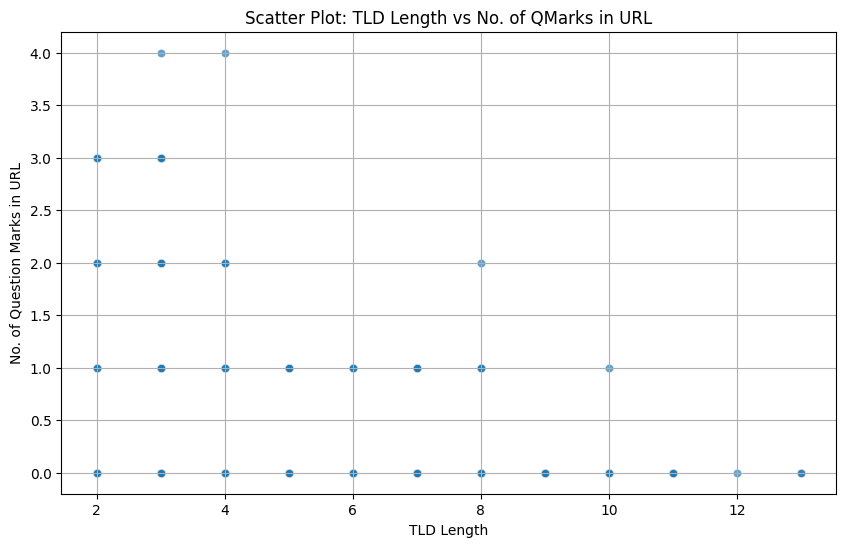

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['TLDLength'], y=df['NoOfQMarkInURL'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of QMarks in URL")
plt.xlabel("TLD Length")
plt.ylabel("No. of Question Marks in URL")
plt.grid(True)

plt.show()

####TLD Length Vs No Of Other Special Characters In URL

<ipython-input-32-88a53a9f5da7>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['TLDLength'], y=df['NoOfOtherSpecialCharsInURL'], alpha=0.7, palette="coolwarm")


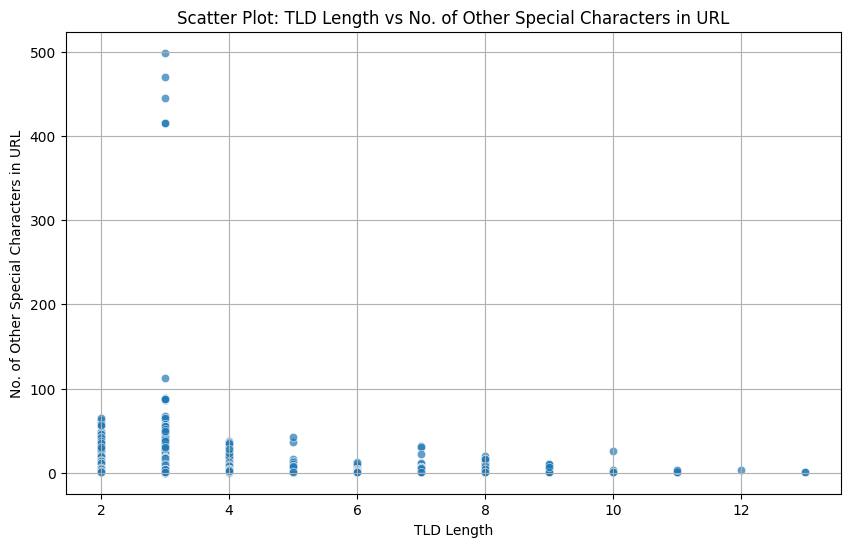

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['TLDLength'], y=df['NoOfOtherSpecialCharsInURL'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of Other Special Characters in URL")
plt.xlabel("TLD Length")
plt.ylabel("No. of Other Special Characters in URL")
plt.grid(True)
plt.show()

####No Of Subdomain Vs No Of Qmark in URL

<ipython-input-33-9cca4b20f152>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['NoOfSubDomain'], y=df['NoOfQMarkInURL'], alpha=0.7, palette="coolwarm")


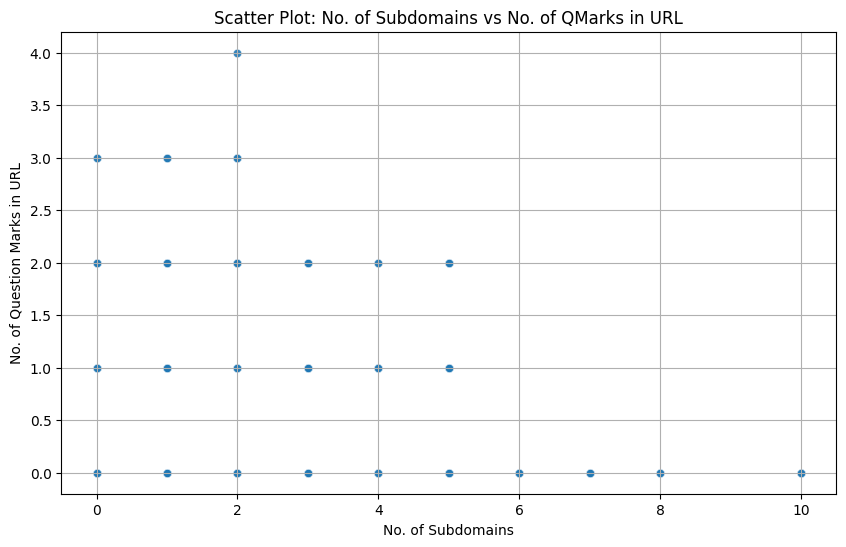

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfSubDomain'], y=df['NoOfQMarkInURL'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No. of Subdomains vs No. of QMarks in URL")
plt.xlabel("No. of Subdomains")
plt.ylabel("No. of Question Marks in URL")
plt.grid(True)
plt.show()

####No Of Qmark In URL Vs No Of Apersand In URL

<ipython-input-34-1b26d40ad353>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['NoOfQMarkInURL'], y=df['NoOfAmpersandInURL'], alpha=0.7, palette="coolwarm")


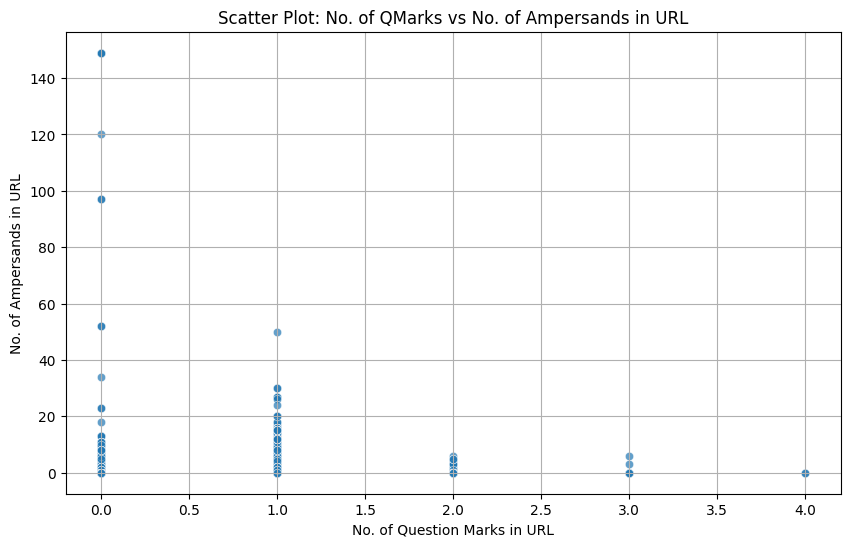

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfQMarkInURL'], y=df['NoOfAmpersandInURL'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No. of QMarks vs No. of Ampersands in URL")
plt.xlabel("No. of Question Marks in URL")
plt.ylabel("No. of Ampersands in URL")
plt.grid(True)
plt.show()

####No Of Subdomain Vs No Of Other Special Characters in URL

<ipython-input-35-5cf7ee0c07e7>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['NoOfSubDomain'], y=df['NoOfOtherSpecialCharsInURL'], alpha=0.7, palette="coolwarm")


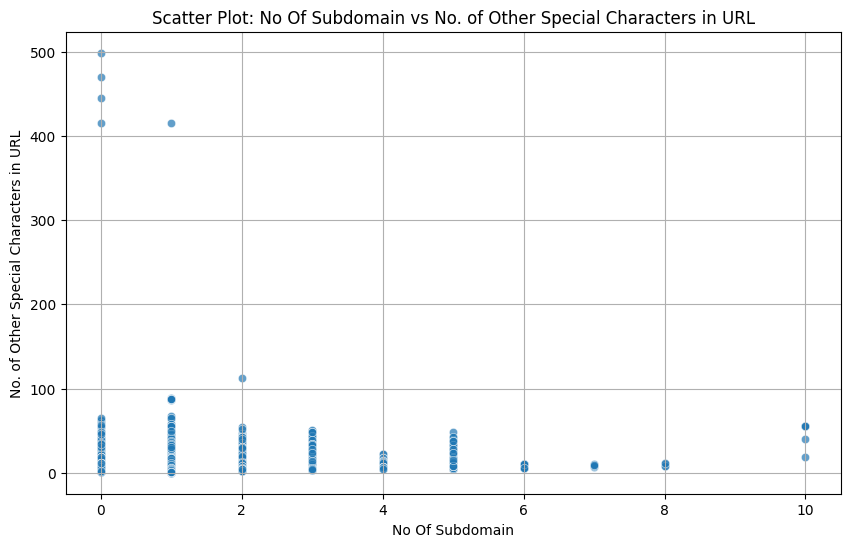

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfSubDomain'], y=df['NoOfOtherSpecialCharsInURL'], alpha=0.7, palette="coolwarm")
# Customize plot
plt.title("Scatter Plot: No Of Subdomain vs No. of Other Special Characters in URL")
plt.xlabel("No Of Subdomain")
plt.ylabel("No. of Other Special Characters in URL")
plt.grid(True)
plt.show()

####No Of QMark In URL Vs No Of Ampersand In URL

<ipython-input-36-1b26d40ad353>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['NoOfQMarkInURL'], y=df['NoOfAmpersandInURL'], alpha=0.7, palette="coolwarm")


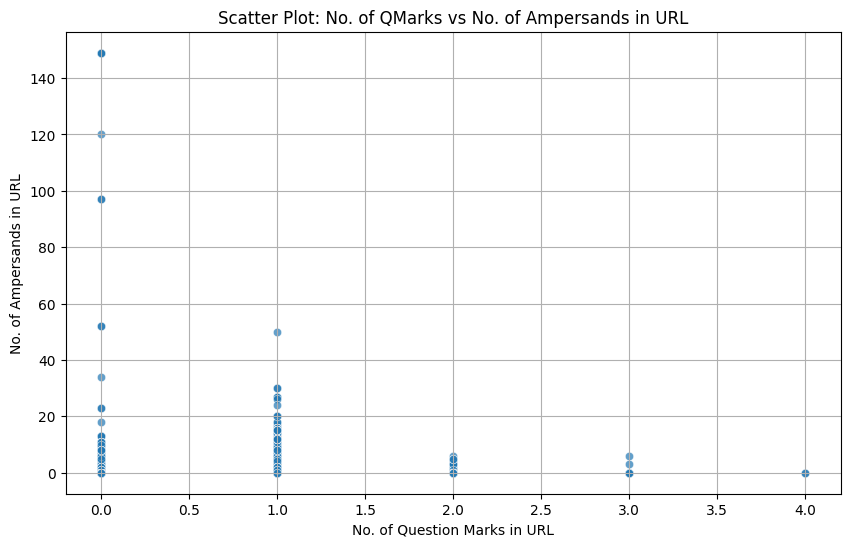

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfQMarkInURL'], y=df['NoOfAmpersandInURL'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No. of QMarks vs No. of Ampersands in URL")
plt.xlabel("No. of Question Marks in URL")
plt.ylabel("No. of Ampersands in URL")
plt.grid(True)
plt.show()

####No Of QMark In URL Vs No Of Other Special Characters In URL

<ipython-input-37-7caf059b1a9a>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['NoOfQMarkInURL'], y=df['NoOfOtherSpecialCharsInURL'],alpha=0.7, palette="coolwarm")


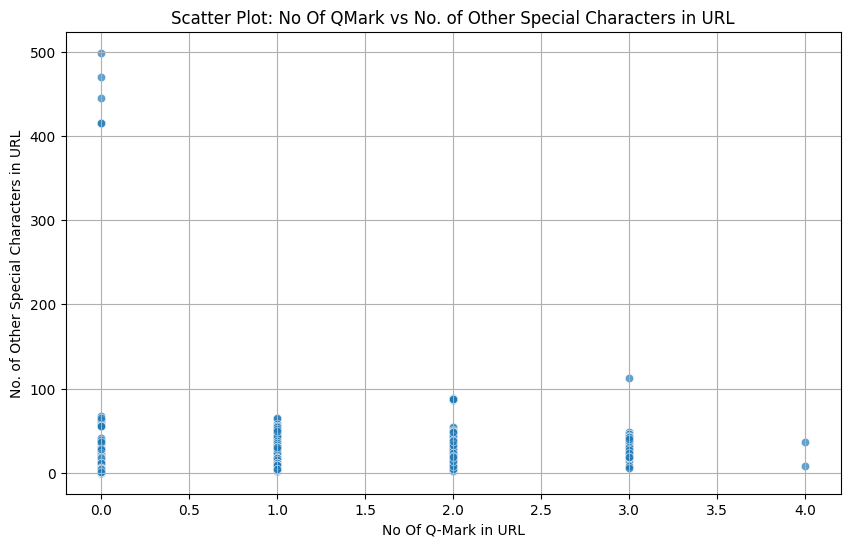

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfQMarkInURL'], y=df['NoOfOtherSpecialCharsInURL'],alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No Of QMark vs No. of Other Special Characters in URL")
plt.xlabel('No Of Q-Mark in URL')
plt.ylabel("No. of Other Special Characters in URL")
plt.grid(True)
plt.show()

####No Of Ampersand In URL Vs No Of Other Special Characters In URL

<ipython-input-38-7573168e757c>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['NoOfAmpersandInURL'], y=df['NoOfOtherSpecialCharsInURL'],alpha=0.7, palette="coolwarm")


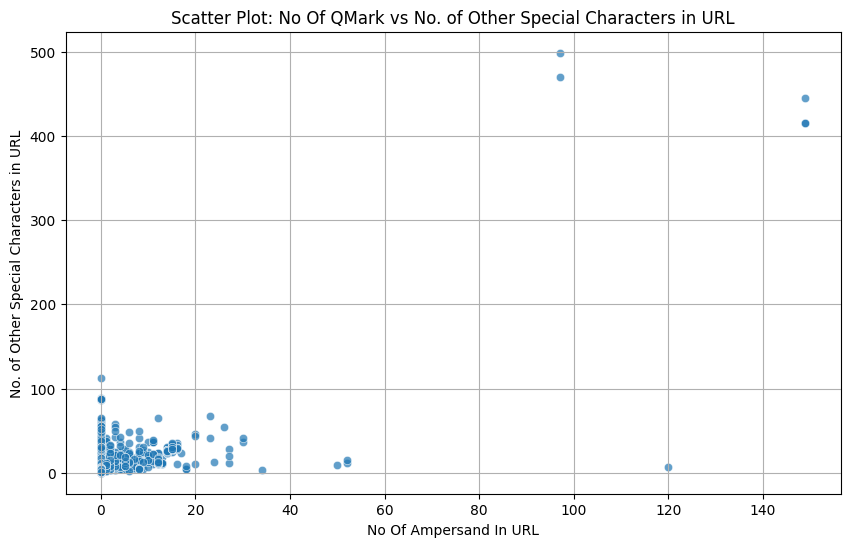

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfAmpersandInURL'], y=df['NoOfOtherSpecialCharsInURL'],alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No Of QMark vs No. of Other Special Characters in URL")
plt.xlabel('No Of Ampersand In URL')
plt.ylabel("No. of Other Special Characters in URL")
plt.grid(True)
plt.show()

###Multivariate

#### TLD Length vs No. of Question Marks in URL (Coloured by Phishing)

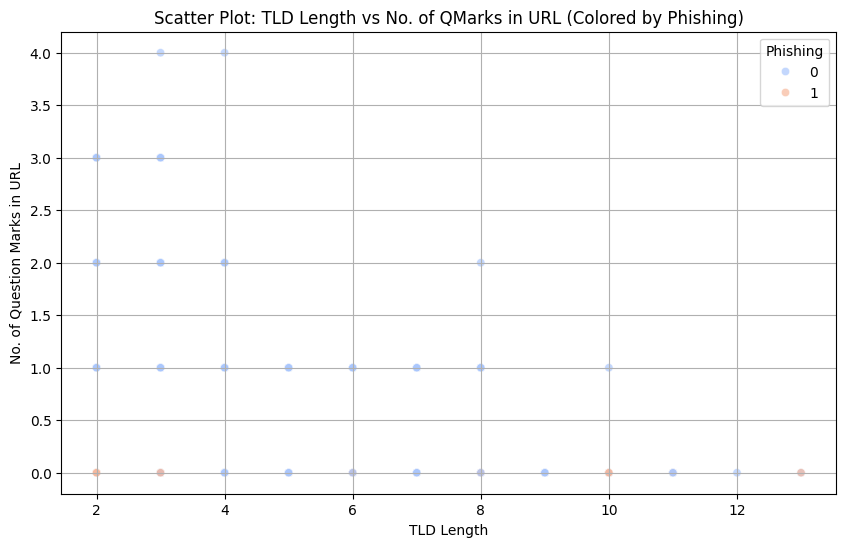

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['TLDLength'], y=df['NoOfQMarkInURL'], hue=df['Phishing'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of QMarks in URL (Colored by Phishing)")
plt.xlabel("TLD Length")
plt.ylabel("No. of Question Marks in URL")
plt.legend(title="Phishing")  # Add legend for hue
plt.grid(True)
plt.show()

#### TLD Length vs No of Subdomain (Coloured by Phishing)

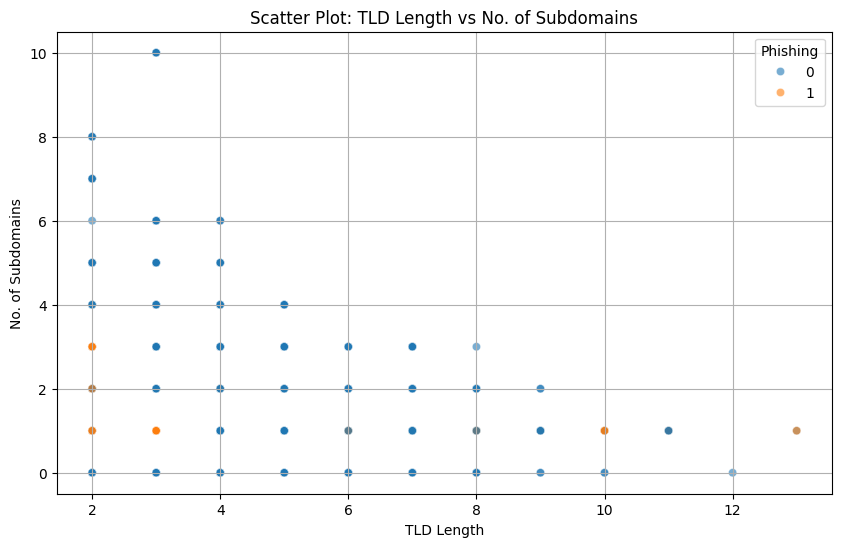

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=df['TLDLength'], y=df['NoOfSubDomain'],hue=df['Phishing'] ,alpha=0.6, color='blue')

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of Subdomains")
plt.xlabel("TLD Length")
plt.ylabel("No. of Subdomains")
plt.grid(True)

plt.show()

#### TLD Length vs No. of Ampersands in URL (Coloured by Phishing)

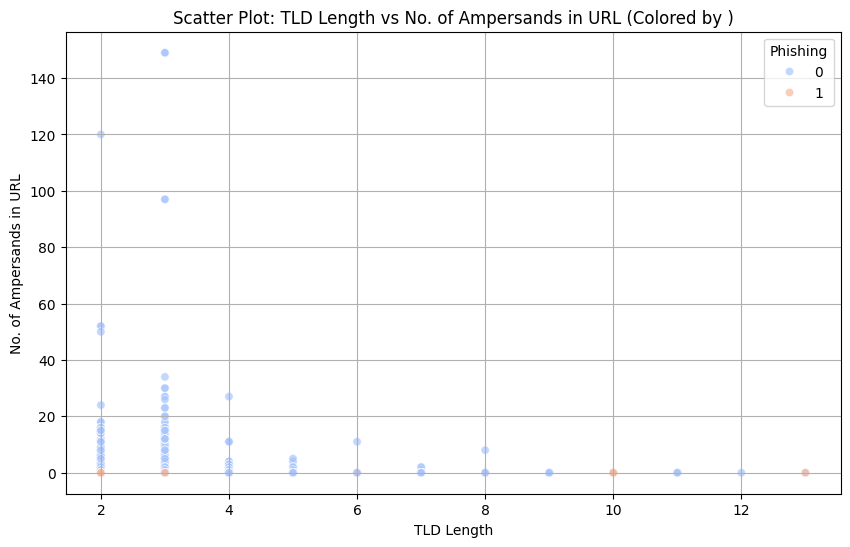

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (coloring by label)
sns.scatterplot(x=df['TLDLength'], y=df['NoOfAmpersandInURL'], hue=df['Phishing'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of Ampersands in URL (Colored by )")
plt.xlabel("TLD Length")
plt.ylabel("No. of Ampersands in URL")
plt.legend(title="Phishing")  # Add legend for hue
plt.grid(True)
plt.show()

####  TLD Length vs No. of Other Special Characters in URL (Colored by Phishing Label)

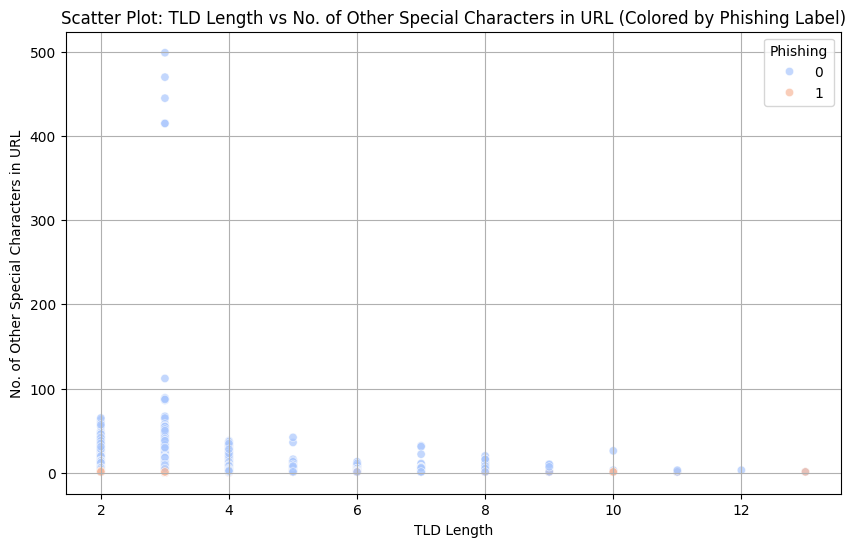

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['TLDLength'], y=df['NoOfOtherSpecialCharsInURL'], hue=df['Phishing'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: TLD Length vs No. of Other Special Characters in URL (Colored by Phishing Label)")
plt.xlabel("TLD Length")
plt.ylabel("No. of Other Special Characters in URL")
plt.legend(title="Phishing")  # Add legend for hue
plt.grid(True)

plt.show()


#### No. of Subdomains vs No. of QMarks in URL (Colored by Phishing)

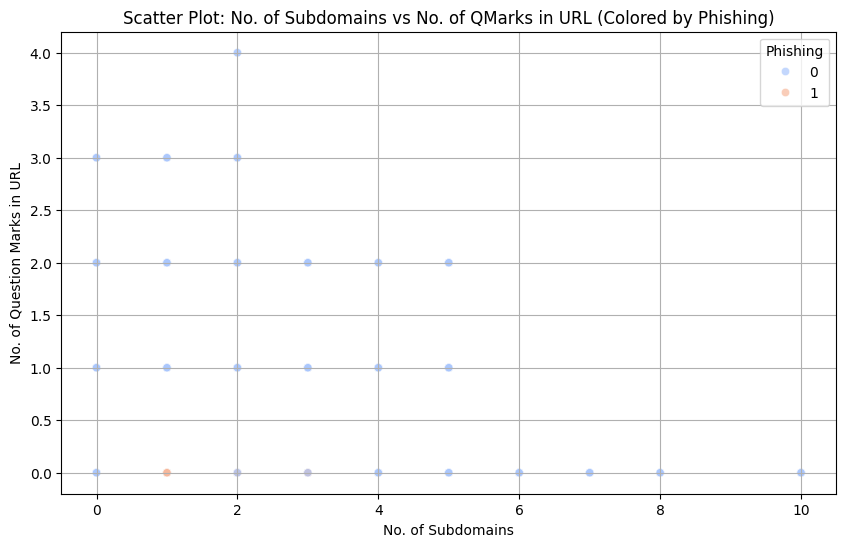

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfSubDomain'], y=df['NoOfQMarkInURL'], hue=df['Phishing'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No. of Subdomains vs No. of QMarks in URL (Colored by Phishing)")
plt.xlabel("No. of Subdomains")
plt.ylabel("No. of Question Marks in URL")
plt.legend(title="Phishing")  # Add legend for hue
plt.grid(True)

plt.show()


#### No. of QMarks vs No. of Ampersands in URL (Colored by Phishing)

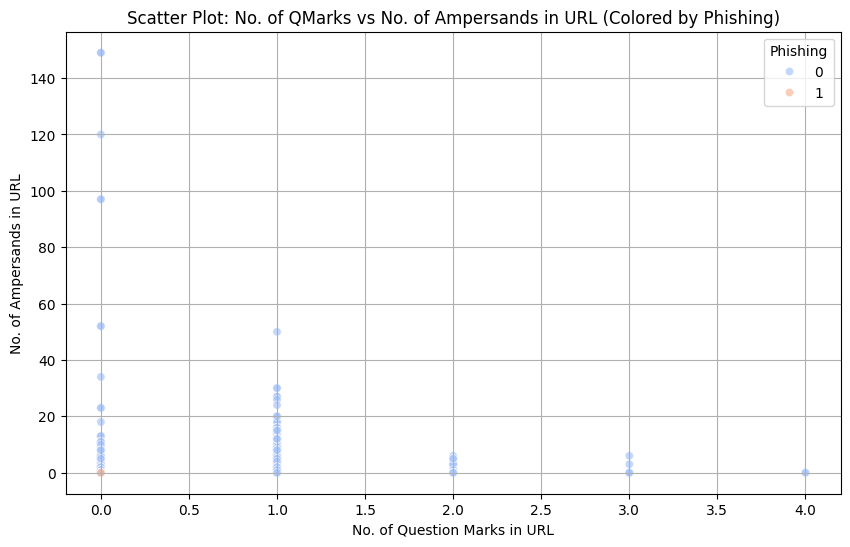

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfQMarkInURL'], y=df['NoOfAmpersandInURL'], hue=df['Phishing'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No. of QMarks vs No. of Ampersands in URL (Colored by Phishing)")
plt.xlabel("No. of Question Marks in URL")
plt.ylabel("No. of Ampersands in URL")
plt.legend(title="Phishing")  # Add legend for hue
plt.grid(True)
plt.show()


#### No. of Ampersands vs No. of Other Special Characters in URL (Colored by Phishing)

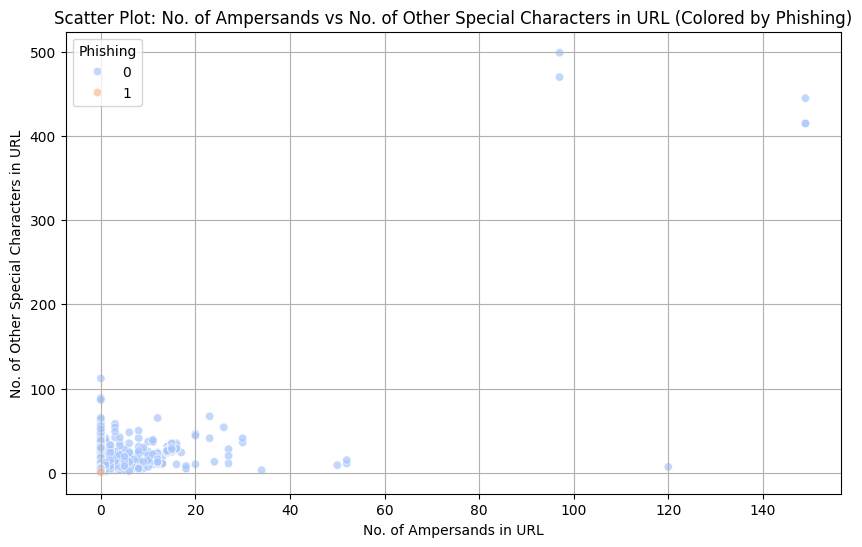

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with hue (label for phishing status)
sns.scatterplot(x=df['NoOfAmpersandInURL'], y=df['NoOfOtherSpecialCharsInURL'], hue=df['Phishing'], alpha=0.7, palette="coolwarm")

# Customize plot
plt.title("Scatter Plot: No. of Ampersands vs No. of Other Special Characters in URL (Colored by Phishing)")
plt.xlabel("No. of Ampersands in URL")
plt.ylabel("No. of Other Special Characters in URL")
plt.legend(title="Phishing")  # Add legend for hue
plt.grid(True)

plt.show()


## Data Encoding

In [ ]:
# Drop unnecessary columns
df.drop(columns=['FILENAME','URL','Domain','Title'], inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Apply Label Encoding to 'TLD' and 'Title'
label_encoder_tld = LabelEncoder()
df['TLD'] = label_encoder_tld.fit_transform(df['TLD'])


# Display the transformed dataframe
df.head()



URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0         31            24           0  231               100.0   
1         23            16           0  254               100.0   
2         29            22           0  647               100.0   
3         26            19           0  231               100.0   
4         33            26           0  503               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           0.522907     0.061933          3   
1              0.666667           0.032650     0.050207          2   
2              0.866667           0.028555     0.064129          2   
3              1.000000           0.522907     0.057606          3   
4              1.000000           0.079963     0.059441          3   

   NoOfSubDomain  HasObfuscation  NoOfObfuscatedChar  ObfuscationRatio  \
0              1               0                   0               0.0   
1              1               0                   0               0.0   
2              2               0                   0               0.0   
3              1               0                   0               0.0   
4              1               0                   0               0.0   

   NoOfLettersInURL  LetterRatioInURL  NoOfDigitsInURL  DigitRatioInURL  \
0                18             0.581                0              0.0   
1                 9             0.391                0              0.0   
2                15             0.517                0              0.0   
3                13             0.500                0              0.0   
4                20             0.606                0              0.0   

   NoOfEqualsInURL  NoOfQMarkInURL  NoOfAmpersandInURL  \
0                0               0                   0   
1                0               0                   0   
2                0               0                   0   
3                0               0                   0   
4                0               0                   0   

   NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  IsHTTPS  LineOfCode  \
0                           1                  0.032        1         558   
1                           2                  0.087        1         618   
2                           2                  0.069        1         467   
3                           1                  0.038        1        6356   
4                           1                  0.030        1        6089   

   LargestLineLength  HasTitle  DomainTitleMatchScore  URLTitleMatchScore  \
0               9381         1               0.000000            0.000000   
1               9381         1              55.555556           55.555556   
2                682         1              46.666667           46.666667   
3              26824         1               0.000000            0.000000   
4              28404         1             100.000000          100.000000   

   HasFavicon  Robots  IsResponsive  NoOfURLRedirect  NoOfSelfRedirect  \
0           0       1             1                0                 0   
1           1       1             0                0                 0   
2           0       1             1                0                 0   
3           0       1             1                0                 0   
4           0       1             1                1                 1   

   HasDescription  NoOfPopup  NoOfiFrame  HasExternalFormSubmit  HasSocialNet  \
0               0          0           1                      0             0   
1               0          0           0                      0             1   
2               1          0           0                      0             0   
3               0          1          12                      0             1   
4               1          0           2                      0             1   

   HasSubmitButton  HasHiddenFields  HasPasswordField  Bank  Pay  Crypto  \


In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

##Feature Selection

In [ ]:
import pandas as pd
import numpy as np

def calc_woe_iv(df, feature, target, epsilon=1e-6):
    groups = df.groupby(feature)[target].agg(['count', 'sum'])
    groups.columns = ['total', 'bad']
    groups['good'] = groups['total'] - groups['bad']

    groups['bad_dist'] = (groups['bad'] + epsilon) / (groups['bad'].sum() + epsilon * len(groups))
    groups['good_dist'] = (groups['good'] + epsilon) / (groups['good'].sum() + epsilon * len(groups))

    groups['WOE'] = np.log(groups['good_dist'] / groups['bad_dist'])
    groups['IV'] = (groups['good_dist'] - groups['bad_dist']) * groups['WOE']

    return groups['WOE'], groups['IV'].sum()

# Compute IV for all features
iv_values = {}
target = 'Phishing'  # Assuming 'Phishing' is the target variable
features = [col for col in df.columns if col != target]

for feature in features:
    try:
        _, iv = calc_woe_iv(df, feature, target)
        iv_values[feature] = iv
    except Exception as e:
        print(f"Skipping feature {feature} due to error: {e}")

# Sort features by IV value
sorted_iv = sorted(iv_values.items(), key=lambda x: x[1], reverse=True)

# Display top features
print("Top Features by Information Value:")
top_features = [feature for feature, iv in sorted_iv[:10]]
for feature, iv in sorted_iv[:10]:
    print(f"{feature}: {iv:.4f}")

# Create a new DataFrame with the top features
df_top_features = df[top_features + [target]]



Top Features by Information Value:
LineOfCode: 29.8513
URLCharProb: 27.5789
URLSimilarityIndex: 20.7335
LargestLineLength: 19.4166
NoOfSelfRef: 15.2712
IsHTTPS: 13.0284
NoOfExternalRef: 12.9500
NoOfImage: 12.1284
LetterRatioInURL: 10.3181
NoOfJS: 7.8045


##Multicollinearity

In [ ]:
# Compute VIF before train-test split
X = df_top_features.drop(columns=['Phishing'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) before splitting:\n", vif_data)

# Filter features with VIF > 10
features_to_drop = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
remaining_features = vif_data[vif_data['VIF'] <= 10]['Feature'].tolist()

print("\nFeatures removed due to high VIF (>10):\n", features_to_drop)
print("\nRemaining Features:\n", remaining_features)

# Drop high VIF features
df_filtered = df_top_features.drop(columns=features_to_drop)

# Compute VIF after filtering
X_filtered = df_filtered.drop(columns=['Phishing'])
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Feature"] = X_filtered.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]
print("\nVariance Inflation Factor (VIF) after filtering:\n", vif_data_filtered)





Variance Inflation Factor (VIF) before splitting:
               Feature        VIF
0          LineOfCode   1.504104
1         URLCharProb  51.913660
2  URLSimilarityIndex  22.365584
3   LargestLineLength   1.014748
4         NoOfSelfRef   2.484552
5             IsHTTPS   5.793824
6     NoOfExternalRef   2.157968
7           NoOfImage   1.377204
8    LetterRatioInURL  19.552500
9              NoOfJS   1.404289

Features removed due to high VIF (>10):
 ['URLCharProb', 'URLSimilarityIndex', 'LetterRatioInURL']

Remaining Features:
 ['LineOfCode', 'LargestLineLength', 'NoOfSelfRef', 'IsHTTPS', 'NoOfExternalRef', 'NoOfImage', 'NoOfJS']

Variance Inflation Factor (VIF) after filtering:
              Feature       VIF
0         LineOfCode  1.500531
1  LargestLineLength  1.006716
2        NoOfSelfRef  2.464875
3            IsHTTPS  1.493762
4    NoOfExternalRef  2.156676
5          NoOfImage  1.363412
6             NoOfJS  1.343111


## Train and Test

In [ ]:
# Define target and features
X = df_filtered.drop(columns=['Phishing'])
y = df_filtered['Phishing']

# Split data into training and testing (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




Training Logistic Regression...
Training Accuracy: 0.9884
Test Accuracy: 0.9872
Mean CV Accuracy: 0.9881

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     20189
           1       0.99      0.98      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



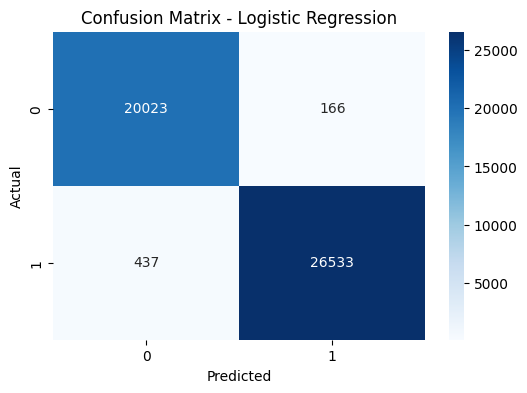

Model saved as logistic_regression.pkl

Training Decision Tree...
Training Accuracy: 1.0000
Test Accuracy: 0.9956
Mean CV Accuracy: 0.9955

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



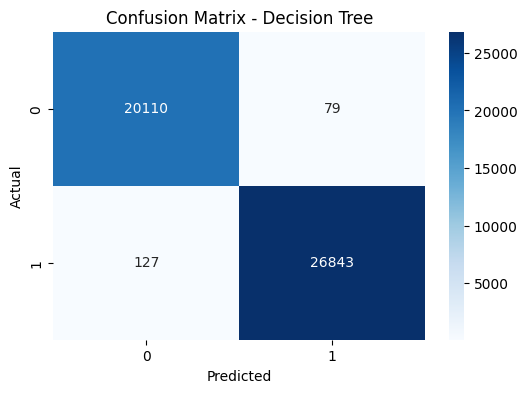

Model saved as decision_tree.pkl

Training Random Forest...
Training Accuracy: 1.0000
Test Accuracy: 0.9976
Mean CV Accuracy: 0.9974

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



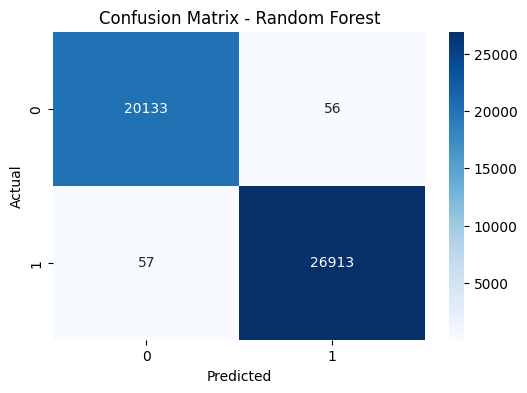

Model saved as random_forest.pkl

Training K-Nearest Neighbors...
Training Accuracy: 0.9966
Test Accuracy: 0.9951
Mean CV Accuracy: 0.9951

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



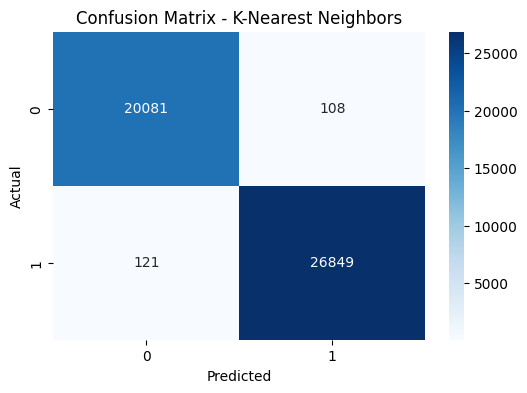

Model saved as k-nearest_neighbors.pkl

Training Naive Bayes...
Training Accuracy: 0.9766
Test Accuracy: 0.9790
Mean CV Accuracy: 0.9766

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     20189
           1       0.97      0.99      0.98     26970

    accuracy                           0.98     47159
   macro avg       0.98      0.98      0.98     47159
weighted avg       0.98      0.98      0.98     47159



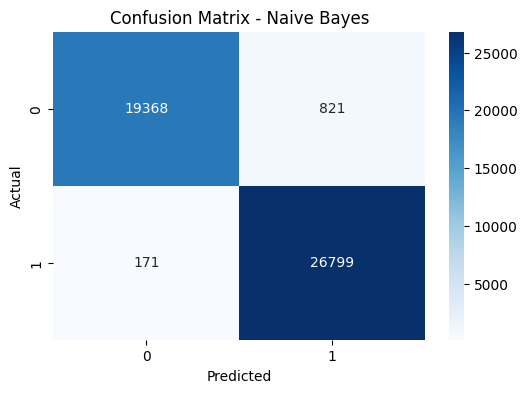

Model saved as naive_bayes.pkl

Training Neural Network...
Training Accuracy: 0.9939
Test Accuracy: 0.9933
Mean CV Accuracy: 0.9934

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     20189
           1       1.00      0.99      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



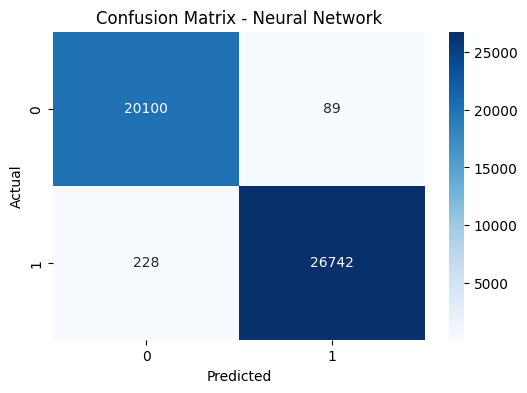

Model saved as neural_network.pkl

Training SVM...
Training Accuracy: 0.9901
Test Accuracy: 0.9895
Mean CV Accuracy: 0.9900

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20189
           1       0.99      0.99      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



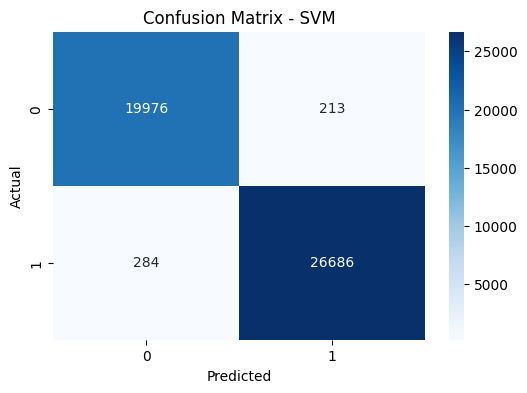

Model saved as svm.pkl


In [ ]:
# Apply SMOTE separately
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Train, evaluate, and save each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_test)

    # Evaluate model
    train_accuracy = accuracy_score(y_train_resampled, pipeline.predict(X_train_resampled))
    test_accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Save each model separately
    filename = f"{name.replace(' ', '_').lower()}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(pipeline, f)
    print(f"Model saved as {filename}")

In [ ]:
# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Class Distribution in Training Data:
 Phishing
1    107880
0     80756
Name: count, dtype: int64


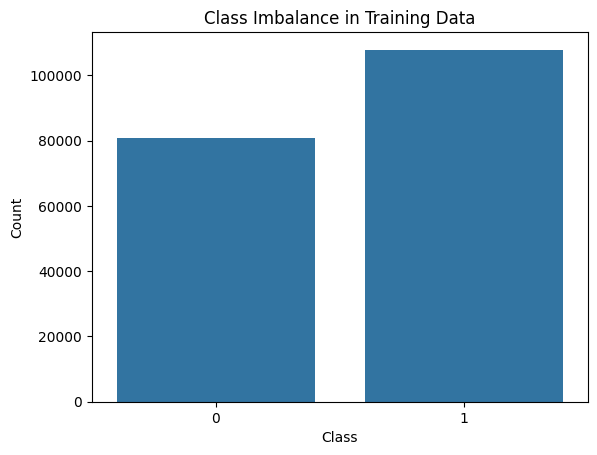

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Count target class distribution
# class_counts = y_train.value_counts()
# print("Class Distribution in Training Data:\n", class_counts)

# # Plot class distribution
# sns.barplot(x=class_counts.index, y=class_counts.values)
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.title("Class Imbalance in Training Data")
# plt.show()


In [ ]:
# !pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Before balancing
# print("Class Distribution Before SMOTE:", Counter(y_train))

# # Apply SMOTE to balance classes
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# # After balancing
# print("Class Distribution After SMOTE:", Counter(y_train_balanced))


Class Distribution Before SMOTE: Counter({1: 107880, 0: 80756})
Class Distribution After SMOTE: Counter({1: 107880, 0: 107880})


##Logistic Regression

In [ ]:
#!pip install statsmodels

In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Apply SMOTE to balance classes
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# # Train Logistic Regression on balanced data
# model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42, n_jobs=-1)
# model.fit(X_train_balanced, y_train_balanced)  # Training on balanced data

# # Make predictions on test data
# y_pred = model.predict(X_test_scaled)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.9871

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     20189
           1       0.99      0.98      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



In [ ]:
#  Apply SMOTE separately
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42, n_jobs=-1))
])

# Train pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save pipeline to pickle file
with open('Logistic_regression.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline saved as Logistic_regression.pkl")


Model Accuracy: 0.9872

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     20189
           1       0.99      0.98      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159

Pipeline saved as Logistic_regression.pkl


In [ ]:
!pip install MLPClassifier

In [ ]:
# train_accuracy = accuracy_score(y_train_balanced, model.predict(X_train_balanced))
# test_accuracy = accuracy_score(y_test, y_pred)

# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
# # from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

##Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define hyperparameter grid
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'solver': ['lbfgs', 'liblinear']  # Choosing solvers
# }

# # Initialize logistic regression
# log_reg = LogisticRegression(max_iter=1000, random_state=42)

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters and accuracy
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Accuracy Score:", grid_search.best_score_)


In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import GridSearchCV

# # Apply SMOTE to balance classes
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# # Define hyperparameter grid for tuning
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
#     'solver': ['liblinear']  # 'liblinear' supports L1 and L2
# }

# # Perform Grid Search with cross-validation
# log_reg = LogisticRegression(max_iter=1500, random_state=42, n_jobs=-1)
# grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_balanced, y_train_balanced)

# # Best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train final Logistic Regression model with best params
# final_model = LogisticRegression(
#     C=best_params['C'],
#     penalty=best_params['penalty'],
#     solver=best_params['solver'],
#     max_iter=1500,
#     random_state=42,
#     n_jobs=-1
# )
# final_model.fit(X_train_balanced, y_train_balanced)

# # Make predictions on test data
# y_pred = final_model.predict(X_test_scaled)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Final Model Accuracy: {accuracy:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


##Decision Tree

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Before balancing
# print("Class Distribution Before Oversampling:", Counter(y_train))

# # Apply SMOTE to balance classes
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# # After balancing
# print("Class Distribution After Oversampling:", Counter(y_train_balanced))

# # Train Decision Tree on balanced data
# dt = DecisionTreeClassifier(max_depth=10, random_state=42)
# dt.fit(X_train_balanced, y_train_balanced)  # Training on balanced data

# # Make predictions on test data
# y_pred = dt.predict(X_test_scaled)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Decision Tree Accuracy: {accuracy:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))



In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score

In [ ]:
# Apply SMOTE separately
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save pipeline to pickle file
with open('Decision_tree.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline saved as Decision_tree.pkl")


Model Accuracy: 0.9956

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Pipeline saved as Decision_tree.pkl


In [ ]:
# train_accuracy = accuracy_score(y_train_balanced, dt.predict(X_train_balanced))
# test_accuracy = accuracy_score(y_test, y_pred)

# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# # from sklearn.model_selection import cross_val_score
# import numpy as np

# cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

##Random forest


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest on balanced data
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_balanced, y_train_balanced)  # Training on balanced data

# Make predictions on test data
y_pred = rf.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# # train_accuracy = accuracy_score(y_train_balanced, rf.predict(X_train_balanced))
# test_accuracy = accuracy_score(y_test, y_pred)

# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

##NAIVE BAYES

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Before balancing
print("Class Distribution Before Oversampling:", Counter(y_train))

# Apply Random Oversampling to balance classes
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_scaled, y_train)

# After balancing
print("Class Distribution After Oversampling:", Counter(y_train_balanced))

# Train Naive Bayes on balanced data
nb = GaussianNB()
nb.fit(X_train_balanced, y_train_balanced)  # Training on balanced data

# Make predictions on test data
y_pred = nb.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
train_accuracy = accuracy_score(y_train_balanced, nb.predict(X_train_balanced))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

##KNN

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Before balancing
print("Class Distribution Before Oversampling:", Counter(y_train))

# Apply Random Oversampling to balance classes
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_scaled, y_train)

# After balancing
print("Class Distribution After Oversampling:", Counter(y_train_balanced))

# Train K-Nearest Neighbors (KNN) on balanced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)  # Training on balanced data

# Make predictions on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
train_accuracy = accuracy_score(y_train_balanced, knn.predict(X_train_balanced))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

##SVM

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Before balancing
print("Class Distribution Before Oversampling:", Counter(y_train))

# Apply Random Oversampling to balance classes
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_scaled, y_train)

# After balancing
print("Class Distribution After Oversampling:", Counter(y_train_balanced))

# Train Support Vector Machine (SVM) on balanced data
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_balanced, y_train_balanced)  # Training on balanced data

# Make predictions on test data
y_pred = svm.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
train_accuracy = accuracy_score(y_train_balanced, svm.predict(X_train_balanced))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

## Neural Network

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Before balancing
print("Class Distribution Before Oversampling:", Counter(y_train))

# Apply SMOTE to generate synthetic samples and balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# After balancing
print("Class Distribution After SMOTE:", Counter(y_train_balanced))

# Train Neural Network (MLP) with L2 regularization
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam',
                    alpha=0.01, max_iter=500, random_state=42)
mlp.fit(X_train_balanced, y_train_balanced)  # Training on balanced data

# Make predictions on test data
y_pred = mlp.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
train_accuracy = accuracy_score(y_train_balanced, mlp.predict(X_train_balanced))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")